In [38]:
from PIL import Image, ImageDraw
import pandas as pd
from matplotlib import pyplot as plt
import csv

In [39]:
# You can choose the 1024px version instead, but these are nice for initial testing
image_folder = 'IMAGES_512'

In [117]:
# Load train - edit path to suit your setup
df = pd.read_csv('~/Documents/Wrk/zindi/Turtle/Train.csv')
print(train.shape)
df.head()


(1326, 5)


,Image_ID,x,y,w,h
0,04FB1B33,0.481988,0.506076,0.174696,0.405671
1,B04E481E,0.617405,0.313368,0.177734,0.293113
2,32655645,0.490885,0.465856,0.165582,0.357350
3,44D4DA7C,0.472873,0.506076,0.237847,0.409722
4,4F36EF72,0.433811,0.574363,0.180773,0.397569


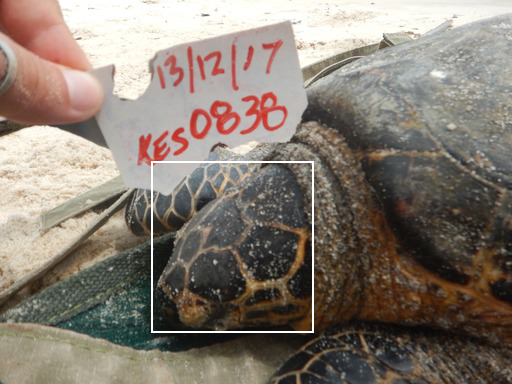

In [29]:
# Take a sample row
imid, x, y, w, h = train.sample().values[0]

# Open with PIL and draw a bounding box
with Image.open(f'{image_folder}/{imid}.JPG') as im:
  imw, imh = im.size # Box coords are relative to image size
  draw = ImageDraw.Draw(im)
  draw.rectangle([int(x*imw), int(y*imh), int((x+w)*imw), int((y+h)*imh)], width=2)
im

In [32]:
'''
for i in range(0,len(train.iloc[:,0])):
    imid, x, y, w, h = train.iloc[i]
    with Image.open(f'{image_folder}/{imid}.JPG') as im:
      imw, imh = im.size # Box coords are relative to image size
    train.iloc[i,1] = int(x*imw)
    train.iloc[i,2]= int(y*imh)
    train.iloc[i,3]= int((x+w)*imw)
    train.iloc[i,4]=int((y+h)*imh)
    
train.head()
'''


"\nfor i in range(0,len(train.iloc[:,0])):\n    imid, x, y, w, h = train.iloc[i]\n    with Image.open(f'{image_folder}/{imid}.JPG') as im:\n      imw, imh = im.size # Box coords are relative to image size\n    train.iloc[i,1] = int(x*imw)\n    train.iloc[i,2]= int(y*imh)\n    train.iloc[i,3]= int((x+w)*imw)\n    train.iloc[i,4]=int((y+h)*imh)\n    \ntrain.head()\n"

In [132]:
import os
directory = '/home/kali/Documents/Wrk/zindi/Turtle/content/images/test/'
save_path = '/home/kali/Documents/Wrk/zindi/Turtle/content/labels/test/'

import numpy as np


for filename in os.listdir(directory):
    ID = str(filename.split('.')[0])
    for _,row in df.iterrows():
        if row['Image_ID'] == ID:
            lst =[0,row['x'],row['y'],row['w'],row['h']]
            lst = np.array(lst)
            txt_filename = ID +".txt"
    # Save the .img & .txt files to the corresponding train and validation folders
    #np.savetxt(txt_filename, lst, fmt=["%d", "%f", "%f", "%f", "%f"])
            completeName = save_path+ txt_filename
            file1 = open(completeName , "w+")
            file1.write('%d' %lst[0])
            file1.write(' ')
            file1.write('%f' %lst[1])
            file1.write(' ')
            file1.write('%f' %lst[2])
            file1.write(' ')
            file1.write('%f' %lst[3])
            file1.write(' ')
            file1.write('%f' %lst[4])
            file1.close()
            

In [93]:
print("No. of Training images", len(os.listdir('/home/kali/Documents/Wrk/zindi/Turtle/output/train')))
print("No. of Training labels", len(os.listdir('//home/kali/Documents/Wrk/zindi/Turtle/labels/train')))

print("No. of valid images", len(os.listdir('/home/kali/Documents/Wrk/zindi/Turtle/output/val')))
print("No. of valid labels", len(os.listdir('/home/kali/Documents/Wrk/zindi/Turtle/labels/val')))

print("No. of test images", len(os.listdir('/home/kali/Documents/Wrk/zindi/Turtle/output/test')))
print("No. of test labels", len(os.listdir('/home/kali/Documents/Wrk/zindi/Turtle/labels/test')))

No. of Training images 1417
No. of Training labels 939
No. of valid images 405
No. of valid labels 257
No. of test images 204
No. of test labels 130


In [136]:
!python /home/kali/Documents/Wrk/zindi/Turtle/yolov5/train.py --img 512 --batch 8 --epochs 10 --data '/home/kali/Documents/Wrk/zindi/Turtle/yolov5/turtle.yaml' --cfg '/home/kali/Documents/Wrk/zindi/Turtle/yolov5/models/yolov5l.yaml' --name Turtle


github: skipping check (not a git repository)
YOLOv5  torch 1.7.1 CUDA:0 (GeForce GTX 1080 Ti, 11175.375MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='/home/kali/Documents/Wrk/zindi/Turtle/yolov5/models/yolov5l.yaml', data='/home/kali/Documents/Wrk/zindi/Turtle/yolov5/turtle.yaml', device='', epochs=10, evolve=False, exist_ok=False, global_rank=-1, hyp='./yolov5/data/hyp.scratch.yaml', image_weights=False, img_size=[512, 512], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='Turtle', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/Turtle8', single_cls=False, sync_bn=False, total_batch_size=8, weights='yolov5s.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, mo

In [101]:
import torch
from IPython.display import Image  # for displaying images
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.6.0 _CudaDeviceProperties(name='GeForce GTX 1080 Ti', major=6, minor=1, total_memory=11175MB, multi_processor_count=28)


In [119]:
from sklearn import model_selection
df_train, df_valid = model_selection.train_test_split(df, test_size=0.2, random_state=13, shuffle=True)
df_train, df_test = model_selection.train_test_split(df_train, test_size=0.1, random_state=13, shuffle=True)
print(df_train.shape, df_valid.shape,df_test.shape)

os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Content')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Conent/images/')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Conent/images/train')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Conent/images/val')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Conent/images/test')

os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Content/labels')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Content/labels/train')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Content/labels/val')
os.mkdir('/home/kali/Documents/Wrk/zindi/Turtle/Content/labels/test')


def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)
  
  for filename in filenames:
    yolo_list = []

    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))
 
## Apply function ## 
src_img_path = "'/home/kali/Documents/Wrk/zindi/Turtle/IMAGES_512"
src_label_path = "/content/BCCD_Dataset/BCCD/Annotations/"

train_img_path = "/content/bcc/images/train"
train_label_path = "/content/bcc/labels/train"

valid_img_path = "/content/bcc/images/valid"
valid_label_path = "/content/bcc/labels/valid"

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

print("No. of Training images", len(os.listdir('/content/bcc/images/train')))
print("No. of Training labels", len(os.listdir('/content/bcc/labels/train')))

print("No. of valid images", len(os.listdir('/content/bcc/images/valid')))
print("No. of valid labels", len(os.listdir('/content/bcc/labels/valid')))

(954, 5) (266, 5) (106, 5)
